

## RNN?

As explained in [this article](http://karpathy.github.io/2015/05/21/rnn-effectiveness/), an RNN takes many input vectors to process them and output other vectors. It can be roughly pictured like in the image below, imagining each rectangle has a vectorial depth and other special hidden quirks in the image below. **In our case, the "many to one" architecture is used**: we accept time series of feature vectors (one vector per time step) to convert them to a probability vector at the output for classification. Note that a "one to one" architecture would be a standard feedforward neural network. 

<img src="http://karpathy.github.io/assets/rnn/diags.jpeg" />

An LSTM is an improved RNN. It is more complex, but easier to train, avoiding what is called the vanishing gradient problem. 


## WorkSheet



In [1]:
# All Includes

import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import tensorflow as tf  # Version 1.0.0 (some previous versions are used in past commits)
from sklearn import metrics
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from sklearn.dummy import DummyClassifier

from sklearn import tree
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.feature_selection import RFE
from sklearn.feature_selection import RFECV
from sklearn.decomposition import PCA

from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.svm import SVC

from sklearn.model_selection import GridSearchCV

%matplotlib inline

import os

c:\users\pheon\appdata\local\programs\python\python35\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


In [1]:
# Useful Constants


# Output classes to learn how to classify
LABELS = [
    "1", 
    "2", 
    "3", 
    "4", 
    "5", 
    "6",
    "7"
] 


## Let's start by downloading the data: 

In [3]:
# Note: Linux bash commands start with a "!" inside those "ipython notebook" cells

#DATA_PATH = "data/"

#!pwd && ls
#os.chdir(DATA_PATH)
#!pwd && ls

#!python download_dataset.py

#!pwd && ls
#os.chdir("..")
#!pwd && ls

DATASET_PATH = "E:/pheon/Documents/DataSets/UCI HAR Dataset/"
print("\n" + "Dataset is now located at: " + DATASET_PATH)



Dataset is now located at: E:/pheon/Documents/DataSets/UCI HAR Dataset/


In [4]:
dataset = 'E:/pheon/Documents/DataSets/workspacedynamics.csv'
df_test = pd.read_csv('E:/pheon/Documents/DataSets/workspacedynamics_set2.csv')
df = pd.read_csv('E:/pheon/Documents/DataSets/mousedynamicsdata.csv')
df.head()

,timestamp,xcoord,ycoord,speed,direction,click,element
0,1.531950e+12,1195,6,400,7,0,0
1,1.531950e+12,1191,3,73,7,0,0
2,1.531950e+12,85,9,353,3,0,0
3,1.531950e+12,94,16,643,3,0,0
4,1.531950e+12,105,24,440,3,0,0


def clickindex():
    iter = np.random.randint(len(clickevents_array) - 3)
    return clickevents_array[iter]

clickindex()

idc = np.random.choice(clickevents_array)
idc

In [5]:
#df.get_value(idc, 'element')

In [6]:
train_nums = len(df) * 0.67000057261743427
t_num = int(train_nums)

In [7]:
x_frame = pd.DataFrame(df[:t_num])
len(x_frame)

70204

In [8]:
x_test_frame = pd.DataFrame(df[t_num:])
len(x_test_frame)

34578

In [9]:
xf = pd.DataFrame(df)
xf_test = pd.DataFrame(df_test)
xf.drop(('timestamp'), axis=1, inplace=True)  ##remove timestamp
xf_test.drop(('timestamp'), axis=1, inplace=True)  ##remove timestamp
xf.drop(('speed'), axis=1, inplace=True)      ## speed, removed/added
xf_test.drop(('speed'), axis=1, inplace=True)
xf.drop(('click'), axis=1, inplace=True)         ##remove click identifier
xf_test.drop(('click'), axis=1, inplace=True)         ##remove click identifier
xf.drop(('element'), axis=1, inplace=True)       ##remove y target from x_dataframe
xf_test.drop(('element'), axis=1, inplace=True)       ##remove y target from x_dataframe
xf_test.head()

,xcoord,ycoord,direction
0,70,1,6
1,54,2,6
2,47,3,6
3,39,3,7
4,34,3,7


In [10]:
x_test_frame.head()

,timestamp,xcoord,ycoord,speed,direction,click,element
70204,1.532530e+12,574,1633,42,1,0,0
70205,1.532530e+12,574,1634,53,3,0,0
70206,1.532530e+12,575,1632,111,2,0,0
70207,1.532530e+12,576,1630,49,1,0,0
70208,1.532530e+12,576,1629,50,1,0,0


In [11]:
clickevent = df["click"] == 1
clickevents_array = np.array(df[clickevent].index) ## returns the index of a training click event

In [12]:
test_clickevent = df_test["click"] == 1
test_clickevents_array = np.array(df_test[test_clickevent].index)  ## returns the index of a click event on the test set

In [13]:
x_scaler = MinMaxScaler()

In [14]:
plus_dfs = pd.DataFrame()
plus_dfs = [xf, xf_test[3:]]
plus_dfs = pd.concat(plus_dfs)

In [15]:
plus_dfs.head()

,xcoord,ycoord,direction
0,1195,6,7
1,1191,3,7
2,85,9,3
3,94,16,3
4,105,24,3


In [16]:
x_train_scaled = x_scaler.fit_transform(xf)

In [17]:
#x_train_scaled = x__scaled[:t_num]


In [18]:
len(x_train_scaled)

104782

In [19]:
x_test_scaled = x_scaler.fit_transform(xf_test)

In [20]:
len(x_test_scaled)

14567

In [21]:
print("Min:", np.min(x_train_scaled))
print("Max:", np.max(x_train_scaled))

Min: 0.0
Max: 1.0


In [22]:
x_train_scaled

array([[6.29942014e-01, 3.47222222e-04, 8.57142857e-01],
       [6.27833421e-01, 1.73611111e-04, 8.57142857e-01],
       [4.48075909e-02, 5.20833333e-04, 2.85714286e-01],
       ...,
       [1.97680548e-01, 3.50694444e-02, 2.85714286e-01],
       [1.98207696e-01, 3.50694444e-02, 2.85714286e-01],
       [1.98207696e-01, 3.50694444e-02, 5.71428571e-01]])

In [23]:
x_test_scaled

array([[4.28658910e-02, 4.30477830e-04, 7.14285714e-01],
       [3.30679731e-02, 8.60955661e-04, 7.14285714e-01],
       [2.87813840e-02, 1.29143349e-03, 7.14285714e-01],
       ...,
       [2.20453154e-01, 2.58717176e-01, 5.71428571e-01],
       [2.21065524e-01, 2.60008610e-01, 4.28571429e-01],
       [2.21065524e-01, 2.60869565e-01, 5.71428571e-01]])

## Preparing dataset:

In [24]:
TRAIN = "train/"
TEST = "test/"


# Load "X" (the neural network's training and testing inputs)

def load_X(X_signals_paths):
    X_signals = []
    
    for signal_type_path in X_signals_paths:
        file = open(signal_type_path, 'r')
        # Read dataset from disk, dealing with text files' syntax
        X_signals.append(
            [np.array(serie, dtype=np.float32) for serie in [
                row.replace('  ', ' ').strip().split(' ') for row in file
            ]]
        )
        file.close()
    
    return np.transpose(np.array(X_signals), (1, 2, 0))

X_train_signals_paths = [
    DATASET_PATH + TRAIN + "Inertial Signals/" + signal + "train.txt" for signal in INPUT_SIGNAL_TYPES
]
X_test_signals_paths = [
    DATASET_PATH + TEST + "Inertial Signals/" + signal + "test.txt" for signal in INPUT_SIGNAL_TYPES
]

X_train = load_X(X_train_signals_paths)
X_test = load_X(X_test_signals_paths)


# Load "y" (the neural network's training and testing outputs)

def load_y(y_path):
    file = open(y_path, 'r')
    # Read dataset from disk, dealing with text file's syntax
    y_ = np.array(
        [elem for elem in [
            row.replace('  ', ' ').strip().split(' ') for row in file
        ]], 
        dtype=np.int32
    )
    file.close()
    
    # Substract 1 to each output class for friendly 0-based indexing 
    return y_ - 1

y_train_path = DATASET_PATH + TRAIN + "y_train.txt"
y_test_path = DATASET_PATH + TEST + "y_test.txt"

y_train = load_y(y_train_path)
y_test = load_y(y_test_path)


In [25]:
X_train.shape
#y_train.shape

(7352, 128, 9)

In [26]:
num_x_signals = x_train_scaled.shape[1]
num_x_signals
num_y_signals = 1

In [27]:
def batch_generator(batch_size, sequence_length, events_array, x, dataframe):
   
    while True:
        x_shape = (batch_size, 10, num_x_signals)
        x_batch = np.zeros(shape=x_shape, dtype=np.float16)

        y_shape = (batch_size, num_y_signals)
        y_batch = np.zeros(shape=y_shape, dtype=np.float16)

        for i in range(batch_size):
            # this gets a random index from the list if indices generated earlier.. clickevents_array
            #clickevents_array[np.random.randint(len(clickevents_array) - 3)]
            idx = np.random.choice(events_array)
    
            # Get array sequences beginning at index, idx
            try:
                y = dataframe.get_value(idx, 'element')
                if y != 0:           #error checking for no
                    y_batch[i] = y
                    acc_X = x[idx - sequence_length:idx]
                    x_batch[i] = acc_X[:10]
            except:
                y_batch[i] = 0
                continue;
        
        yield (x_batch, y_batch)

In [28]:
test_clickevents_array[:15]

array([ 30, 124, 137, 170, 187, 206, 223, 260, 440, 466, 482, 502, 543,
       583, 635], dtype=int64)

In [29]:
batch_size = 1536
sequence_length = 20
sequence_length
training_set_generator = batch_generator(batch_size=batch_size,
                            sequence_length=sequence_length,
                            events_array=clickevents_array, x = x_train_scaled, dataframe = df)
test_set_generator = batch_generator(batch_size=512,
                            sequence_length=sequence_length,
                            events_array=test_clickevents_array, x = x_test_scaled, dataframe = df_test)

x_batch, y_batch = next(training_set_generator)
test_x_batch, test_y_batch = next(test_set_generator)
print(x_batch.shape, test_x_batch.shape)
print(y_batch.shape, test_y_batch.shape)

c:\users\pheon\appdata\local\programs\python\python35\lib\site-packages\ipykernel_launcher.py:17: FutureWarning: get_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead


(1536, 10, 3) (512, 10, 3)
(1536, 1) (512, 1)


In [30]:
x_batch[:5][0][0]

array([0.224  , 0.01886, 0.857  ], dtype=float16)

## Additionnal Parameters:

Here are some core parameter definitions for the training. 

The whole neural network's structure could be summarised by enumerating those parameters and the fact an LSTM is used. 

In [31]:
y_batch

array([[4.],
       [1.],
       [2.],
       ...,
       [1.],
       [2.],
       [1.]], dtype=float16)

## Utility functions for training:

In [32]:
def LSTM_RNN(_X, _weights, _biases):
    # Function returns a tensorflow LSTM (RNN) artificial neural network from given parameters. 
    # Moreover, two LSTM cells are stacked which adds deepness to the neural network. 
    # Note, some code of this notebook is inspired from an slightly different 
    # RNN architecture used on another dataset, some of the credits goes to 
    # "aymericdamien" under the MIT license.

    # (NOTE: This step could be greatly optimised by shaping the dataset once
    # input shape: (batch_size, n_steps, n_input)
    _X = tf.transpose(_X, [1, 0, 2])  # permute n_steps and batch_size
    # Reshape to prepare input to hidden activation
    _X = tf.reshape(_X, [-1, n_input]) 
    # new shape: (n_steps*batch_size, n_input)
    
    # Linear activation
    _X = tf.nn.relu(tf.matmul(_X, _weights['hidden']) + _biases['hidden'])
    # Split data because rnn cell needs a list of inputs for the RNN inner loop
    _X = tf.split(_X, n_steps, 0) 
    # new shape: n_steps * (batch_size, n_hidden)

    # Define two stacked LSTM cells (two recurrent layers deep) with tensorflow
    lstm_cell_1 = tf.contrib.rnn.BasicLSTMCell(n_hidden, forget_bias=1.0, state_is_tuple=True)
    lstm_cell_2 = tf.contrib.rnn.BasicLSTMCell(n_hidden, forget_bias=1.0, state_is_tuple=True)
    lstm_cells = tf.contrib.rnn.MultiRNNCell([lstm_cell_1, lstm_cell_2], state_is_tuple=True)
    # Get LSTM cell output
    outputs, states = tf.contrib.rnn.static_rnn(lstm_cells, _X, dtype=tf.float32)

    # Get last time step's output feature for a "many to one" style classifier, 
    # as in the image describing RNNs at the top of this page
    lstm_last_output = outputs[-1]
    
    # Linear activation
    return tf.matmul(lstm_last_output, _weights['out']) + _biases['out']


def extract_batch_size(_train, step, batch_size):
    # Function to fetch a "batch_size" amount of data from "(X|y)_train" data. 
    
    shape = list(_train.shape)
    shape[0] = batch_size
    batch_s = np.empty(shape)

    for i in range(batch_size):
        # Loop index
        index = ((step-1)*batch_size + i) % len(_train)
        batch_s[i] = _train[index] 

    return batch_s


def one_hot(y_):
    # Function to encode output labels from number indexes 
    # e.g.: [[5], [0], [3]] --> [[0, 0, 0, 0, 0, 1], [1, 0, 0, 0, 0, 0], [0, 0, 0, 1, 0, 0]]
    
    y_ = y_.reshape(len(y_))
    n_values = int(np.max(y_)) + 1
    return np.eye(n_values)[np.array(y_, dtype=np.int32)]  # Returns FLOATS

In [33]:
batch_ys = one_hot(y_batch)


batch_ys[100]

array([0., 0., 1., 0., 0., 0., 0.])

In [34]:
h = one_hot(test_y_batch)
h[2]

array([0., 1., 0., 0., 0., 0., 0.])

In [35]:

# Input Data 

training_data_count = len(x_batch)  # 7352 training series (with 50% overlap between each serie)
test_data_count = len(x_batch)  # 2947 testing series
n_steps = len(x_batch[0])  # 20 timesteps per series
n_input = len(x_batch[0][0])  # 3 input parameters per timestep


# LSTM Neural Network's internal structure

n_hidden = 32 # Hidden layer num of features
n_classes = len(batch_ys[1]) # Total classes (should go up, or should go down)


# Training 

learning_rate = 1e-1 ##0.0025
lambda_loss_amount = 0.0015
training_iters = training_data_count * 300  # Loop 300 times on the dataset
#batch_size = 1500
display_iter = 30000  # To show test set accuracy during training


# Some debugging info

print("Some useful info to get an insight on dataset's shape and normalisation:")
print("(X shape, y shape, every X's mean, every X's standard deviation)")
print(x_batch.shape, y_batch.shape, np.mean(x_batch), np.std(x_batch))
print("The dataset is therefore properly normalised, as expected, but not yet one-hot encoded.")


Some useful info to get an insight on dataset's shape and normalisation:
(X shape, y shape, every X's mean, every X's standard deviation)
(1536, 10, 3) (1536, 1) 0.241 0.2362
The dataset is therefore properly normalised, as expected, but not yet one-hot encoded.


In [36]:
tf.reset_default_graph()

##  Building the neural network:

In [37]:
# Graph input/output
x = tf.placeholder(tf.float32, [None, n_steps, n_input])
y = tf.placeholder(tf.float32, [None, n_classes])

# Graph weights
weights = {
    'hidden': tf.Variable(tf.random_normal([n_input, n_hidden])), # Hidden layer weights
    'out': tf.Variable(tf.random_normal([n_hidden, n_classes], mean=1.0))
}
biases = {
    'hidden': tf.Variable(tf.random_normal([n_hidden])),
    'out': tf.Variable(tf.random_normal([n_classes]))
}

pred = LSTM_RNN(x, weights, biases)

# Loss, optimizer and evaluation
l2 = lambda_loss_amount * sum(
    tf.nn.l2_loss(tf_var) for tf_var in tf.trainable_variables()
) # L2 loss prevents this overkill neural network to overfit the data
cost = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(labels=y, logits=pred)) + l2 # Softmax loss
optimizer = tf.train.AdamOptimizer(learning_rate=learning_rate).minimize(cost) # Adam Optimizer

correct_pred = tf.equal(tf.argmax(pred,1), tf.argmax(y,1))
accuracy = tf.reduce_mean(tf.cast(correct_pred, tf.float32))

Instructions for updating:
Use the retry module or similar alternatives.
Instructions for updating:

Future major versions of TensorFlow will allow gradients to flow
into the labels input on backprop by default.

See tf.nn.softmax_cross_entropy_with_logits_v2.



## Hooray, now train the neural network:

In [38]:
y_batch

array([[4.],
       [1.],
       [2.],
       ...,
       [1.],
       [2.],
       [1.]], dtype=float16)

In [39]:
len(y_batch)

1536

In [40]:
# To keep track of training's performance
test_losses = []
test_accuracies = []
train_losses = []
train_accuracies = []

# Launch the graph
sess = tf.InteractiveSession(config=tf.ConfigProto(log_device_placement=True))
init = tf.global_variables_initializer()
sess.run(init)

# Perform Training steps with "batch_size" amount of example data at each loop
step = 1
while step * batch_size <= training_iters:
    batch_xs =         x_batch
    #batch_ys = one_hot(y_batch)

    # Fit training using batch data
    _, loss, acc = sess.run(
        [optimizer, cost, accuracy],
        feed_dict={
            x: batch_xs, 
            y: batch_ys
        }
    )
    train_losses.append(loss)
    train_accuracies.append(acc)
    
    # Evaluate network only at some steps for faster training: 
    if (step*batch_size % display_iter == 0) or (step == 1) or (step * batch_size > training_iters):
        
        # To not spam console, show training accuracy/loss in this "if"
        print("Training iter #" + str(step*batch_size) + \
              ":   Batch Loss = " + "{:.6f}".format(loss) + \
              ", Accuracy = {}".format(acc))
        
        # Evaluation on the test set (no learning made here - just evaluation for diagnosis)
        loss, acc = sess.run(
            [cost, accuracy], 
            feed_dict={
                x: batch_xs,
                y: batch_ys
            }
        )
        test_losses.append(loss)
        test_accuracies.append(acc)
        print("PERFORMANCE ON TEST SET: " + \
              "Batch Loss = {}".format(loss) + \
              ", Accuracy = {}".format(acc))

    step += 1

print("Optimization Finished!")

# Accuracy for test data

one_hot_predictions, accuracy, final_loss = sess.run(
    [pred, accuracy, cost],
    feed_dict={
        x: batch_xs,
        y: batch_ys
    }
)

test_losses.append(final_loss)
test_accuracies.append(accuracy)

print("FINAL RESULT: " + \
      "Batch Loss = {}".format(final_loss) + \
      ", Accuracy = {}".format(accuracy))


Training iter #1536:   Batch Loss = 2.810500, Accuracy = 0.166015625
PERFORMANCE ON TEST SET: Batch Loss = 6.270389080047607, Accuracy = 0.4264322817325592
Optimization Finished!
FINAL RESULT: Batch Loss = 1.460723638534546, Accuracy = 0.5260416865348816


## Training is good, but having visual insight is even better:

Okay, let's plot this simply in the notebook for now.

c:\users\pheon\appdata\local\programs\python\python35\lib\site-packages\matplotlib\font_manager.py:1328: UserWarning: findfont: Font family ['Bitstream Vera Sans'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


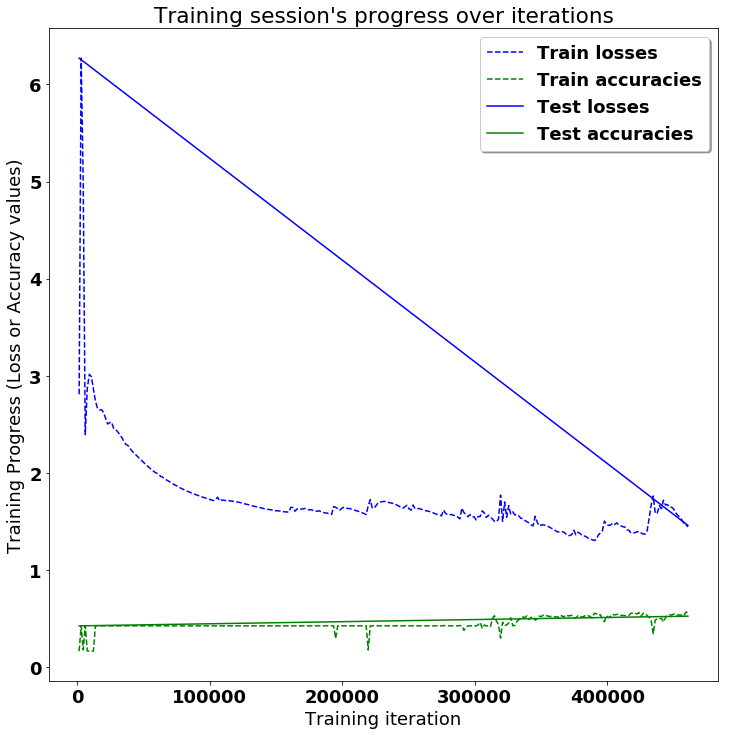

In [41]:
# (Inline plots: )
%matplotlib inline

font = {
    'family' : 'Bitstream Vera Sans',
    'weight' : 'bold',
    'size'   : 18
}
matplotlib.rc('font', **font)

width = 12
height = 12
plt.figure(figsize=(width, height))

indep_train_axis = np.array(range(batch_size, (len(train_losses)+1)*batch_size, batch_size))
plt.plot(indep_train_axis, np.array(train_losses),     "b--", label="Train losses")
plt.plot(indep_train_axis, np.array(train_accuracies), "g--", label="Train accuracies")

indep_test_axis = np.append(
    np.array(range(batch_size, len(test_losses)*display_iter, display_iter)[:-1]),
    [training_iters]
)
plt.plot(indep_test_axis, np.array(test_losses),     "b-", label="Test losses")
plt.plot(indep_test_axis, np.array(test_accuracies), "g-", label="Test accuracies")

plt.title("Training session's progress over iterations")
plt.legend(loc='upper right', shadow=True)
plt.ylabel('Training Progress (Loss or Accuracy values)')
plt.xlabel('Training iteration')

plt.show()

## And finally, the multi-class confusion matrix and metrics!

Testing Accuracy: 52.60416865348816%

Precision: 52.63463852952286%
Recall: 52.604166666666664%
f1_score: 50.51027465179898%

Confusion Matrix:
[[533  24  45  19   0  34]
 [ 95  51  16  53   0  44]
 [110   0  79  67   0  18]
 [ 44  21  15 122   0  53]
 [  3   7   6  31   0  10]
 [  0   0  13   0   0  23]]

Confusion matrix (normalised to % of total test data):
[[34.700523    1.5625      2.9296875   1.2369792   0.          2.2135415 ]
 [ 6.1848955   3.3203125   1.0416667   3.4505208   0.          2.8645835 ]
 [ 7.1614585   0.          5.1432295   4.3619795   0.          1.171875  ]
 [ 2.8645835   1.3671875   0.9765625   7.9427085   0.          3.4505208 ]
 [ 0.1953125   0.45572916  0.390625    2.018229    0.          0.6510416 ]
 [ 0.          0.          0.8463542   0.          0.          1.4973958 ]]
Note: training and testing data is not equally distributed amongst classes, 
so it is normal that more than a 6th of the data is correctly classifier in the last category.


c:\users\pheon\appdata\local\programs\python\python35\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
c:\users\pheon\appdata\local\programs\python\python35\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
c:\users\pheon\appdata\local\programs\python\python35\lib\site-packages\matplotlib\font_manager.py:1328: UserWarning: findfont: Font family ['Bitstream Vera Sans'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


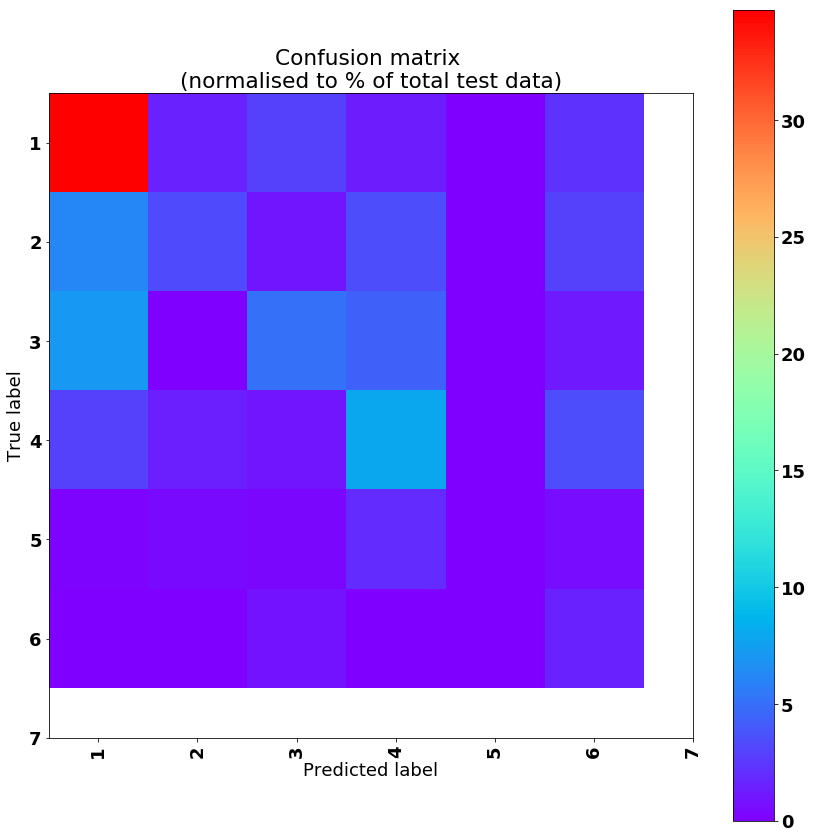

In [42]:
# Results

predictions = one_hot_predictions.argmax(1)

print("Testing Accuracy: {}%".format(100*accuracy))

print("")
print("Precision: {}%".format(100*metrics.precision_score(y_batch, predictions, average="weighted")))
print("Recall: {}%".format(100*metrics.recall_score(y_batch, predictions, average="weighted")))
print("f1_score: {}%".format(100*metrics.f1_score(y_batch, predictions, average="weighted")))

print("")
print("Confusion Matrix:")
confusion_matrix = metrics.confusion_matrix(y_batch, predictions)
print(confusion_matrix)
normalised_confusion_matrix = np.array(confusion_matrix, dtype=np.float32)/np.sum(confusion_matrix)*100

print("")
print("Confusion matrix (normalised to % of total test data):")
print(normalised_confusion_matrix)
print("Note: training and testing data is not equally distributed amongst classes, ")
print("so it is normal that more than a 6th of the data is correctly classifier in the last category.")

# Plot Results: 
width = 12
height = 12
plt.figure(figsize=(width, height))
plt.imshow(
    normalised_confusion_matrix, 
    interpolation='nearest', 
    cmap=plt.cm.rainbow
)
plt.title("Confusion matrix \n(normalised to % of total test data)")
plt.colorbar()
tick_marks = np.arange(n_classes)
plt.xticks(tick_marks, LABELS, rotation=90)
plt.yticks(tick_marks, LABELS)
plt.tight_layout()
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()

In [43]:
one_hot_predictions[9].argmax()

2

In [44]:
one_hot_predictions[9]

array([-2.7952409 ,  0.3119868 ,  1.7389013 , -0.07644495,  1.5864    ,
       -0.13018431,  1.3375489 ], dtype=float32)

In [45]:
sess.close()

def batch_generator_2d(batch_size, sequence_length, events_array, x, dataframe):
   
    while True:
        x_shape = (batch_size, num_x_signals)
        x_batch = np.zeros(shape=x_shape, dtype=np.float16)

        y_shape = (batch_size, num_y_signals)
        y_batch = np.zeros(shape=y_shape, dtype=np.float16)

        for i in range(batch_size):
            # this gets a random index from the list if indices generated earlier.. clickevents_array
            #clickevents_array[np.random.randint(len(clickevents_array) - 3)]
            idx = np.random.choice(events_array)
    
            # Get array sequences beginning at index, idx
            try:
                y = dataframe.get_value(idx, 'element')
                if y != 0:           #error checking for no
                    y_batch[i] = y
                    acc_X = x[idx - sequence_length:idx]
                    x_batch[i] = acc_X[:15]
            except:
                y_batch[i] = 0
                continue;
        
        yield (x_batch, y_batch)

x_frame.head()

training_set_generator_2d = batch_generator_2d(batch_size=batch_size,
                            sequence_length=sequence_length,
                            events_array=clickevents_array, x = x_train_scaled, dataframe = x_frame)
test_set_generator_2d = batch_generator_2d(batch_size=512,
                            sequence_length=sequence_length,
                            events_array=test_clickevents_array, x = x_test_scaled, dataframe = x_test_frame)

X, y = next(training_set_generator_2d)
test_X, test_y = next(test_set_generator_2d)

#test_X.shape
#test_y = one_hot(test_y)
test_X[:15]

decision_tree00 = tree.DecisionTreeClassifier()
dtclf00 = decision_tree00.fit(X, one_hot(y))
dtclf00.score(test_X, one_hot(test_y))

### DataSet
Download The DataSets [here](https://drive.google.com/open?id=1ziDl08cOJNnk6hzrsVIpJFWTU_UbeYOL) 


## References

> Davide Anguita, Alessandro Ghio, Luca Oneto, Xavier Parra and Jorge L. Reyes-Ortiz. A Public Domain Dataset for Human Activity Recognition Using Smartphones. 21th European Symposium on Artificial Neural Networks, Computational Intelligence and Machine Learning, ESANN 2013. Bruges, Belgium 24-26 April 2013.


> Guillaume Chevalier, LSTMs for Human Activity Recognition, 2016
> https://github.com/guillaume-chevalier/LSTM-Human-Activity-Recognition





In [46]:
#convert notebook to a README for the GitHub project's title page:
!jupyter nbconvert --to markdown LSTM.ipynb
!mv LSTM.md README.md

This application is used to convert notebook files (*.ipynb) to various other
formats.


Options

-------



Arguments that take values are actually convenience aliases to full
Configurables, whose aliases are listed on the help line. For more information
on full configurables, see '--help-all'.


--inplace

    Run nbconvert in place, overwriting the existing notebook (only 
    relevant when converting to notebook format)

--generate-config

    generate default config file

--execute

    Execute the notebook prior to export.

--clear-output

    Clear output of current file and save in place, 
    overwriting the existing notebook.

-y

    Answer yes to any questions instead of prompting.

--stdout

    Write notebook output to stdout instead of files.

--no-prompt

    Exclude input and output prompts from converted document.

--allow-errors

    Continue notebook execution even if one of the cells throws an error and include the error message in the cell output (the default beha

[NbConvertApp] WARNING | pattern 'LSTM.ipynb' matched no files
'mv' is not recognized as an internal or external command,
operable program or batch file.
